# K-Means Clustering

In [3]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import utils

%matplotlib inline

In [ ]:
def find_closest_centroids(X, centroids):
  idx = np.zeros(X.shape[0], dtype=int) # as many as the examples

  for i in range(X.shape[0]):
    distance = [] 
    for j in range(centroids.shape[0]):
        norm_ij = np.linalg.norm(X[i] - centroids[j])
        distance.append(norm_ij)

    idx[i] = np.argmin(distance)

  return idx


In [71]:
X = utils.load_data()
initial_centroids = np.array([[3,3], [6,2], [8,5]])

c_indices = find_closest_centroids(X, initial_centroids)

In [72]:
from public_tests import find_closest_centroids_test

find_closest_centroids_test(find_closest_centroids)

All tests passed!


In [73]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # Useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly
    centroids = np.zeros((K, n))
    counts = np.zeros(K)
    
    ### START CODE HERE ###
    for c_i in range(K):
        c_datapoints = X[idx == c_i]
        new_c = np.mean(c_datapoints, axis=0)
        centroids[c_i] = new_c
    ### END CODE HERE ## 
    
    return centroids

In [74]:
K = 3

centroids = compute_centroids(X, idx=c_indices, K=K)

In [75]:
centroids

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [78]:
from utils import plot_progress_kMeans

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i+1, max_iters))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 1/10
K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration 9/10
K-Means iteration 10/10


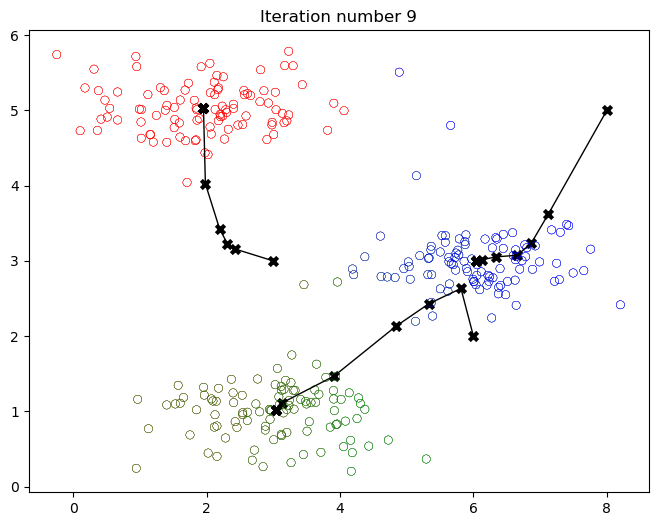

In [79]:
X = utils.load_data()
initial_centroids = np.array([[3,3],[6,2],[8,5]])
centroids, idx = run_kMeans(X, initial_centroids, 10, plot_progress=True)